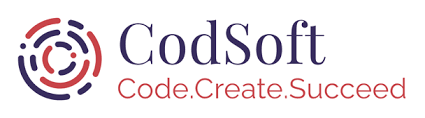

# CodSoft Data Science Internship

# BY SHREYA JAYESH  BILTHERIA

## Task 3 : IRIS FLOWER CLASSIFICATION

The Iris flower dataset consists of three species: setosa, versicolor,
and virginica. These species can be distinguished based on their
measurements. Now, imagine that you have the measurements
of Iris flowers categorized by their respective species. Your
objective is to train a machine learning model that can learn from
these measurements and accurately classify the Iris flowers into
their respective species.

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.

### Description

The goal is to construct a robust machine learning model capable of classifying iris flowers into three distinct species: setosa, versicolor, and virginica. Extensive exploration and preprocessing of the iris dataset were undertaken while making this project, utilizing various data visualization techniques to delve into its characteristics.
    Key steps such as data partitioning, model training, and evaluation were meticulously executed. 
    Logistic Regression emerged as the chosen machine learning algorithm for this task.
    Demonstrating an impressive accuracy of 97.37%, the model proved its efficiency in precisely classifying different flower species.

## Importing all necessary libraries and loading the dataset

In [1]:
#import libraries for project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from warnings import filterwarnings
filterwarnings(action='ignore')

In [2]:
#loading dataset
df=pd.read_csv("IRIS.csv")
#display first five entries
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


## Understanding and exploring the dataset

In [4]:
#showing size of the dataset
df.shape 

(150, 5)

In [5]:
#displaying last five entries
df.tail() 

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
# Getting information about the dataset
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#showing datatypes
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [8]:
#showing statistical summary of the dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Checking Null values

In [9]:
df.isnull() #Returns True or False based on presence of null values

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [10]:
df.notnull().sum()  #check for non-null values

sepal_length    150
sepal_width     150
petal_length    150
petal_width     150
species         150
dtype: int64

In [11]:
df.isnull().sum() #checks for null values

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Hence,there are no null values in the dataset.
Dataset is free from null values.

## Data Analysis

In [12]:
df.columns #returns columns of the dataset

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [13]:
#performs a grouping operation on the DataFrame df based on the unique values present in the 'Species' column
df.groupby('species').size()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [14]:
df['species'].unique().tolist()  # retrieves unique values from the 'Species' column in the DataFrame df 

['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

In [15]:
df.isnull().sum() #checks for null values 

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Data Visualization

1.Utilizing Box Plots, Pair Plots, and Count Plots.

2.Comprehensive Data Visualization and Analysis.

3.Visualizing Data Patterns with Box Plots, Pair Plots, and Count Plots.

## Pairplot to visualize relationships between features

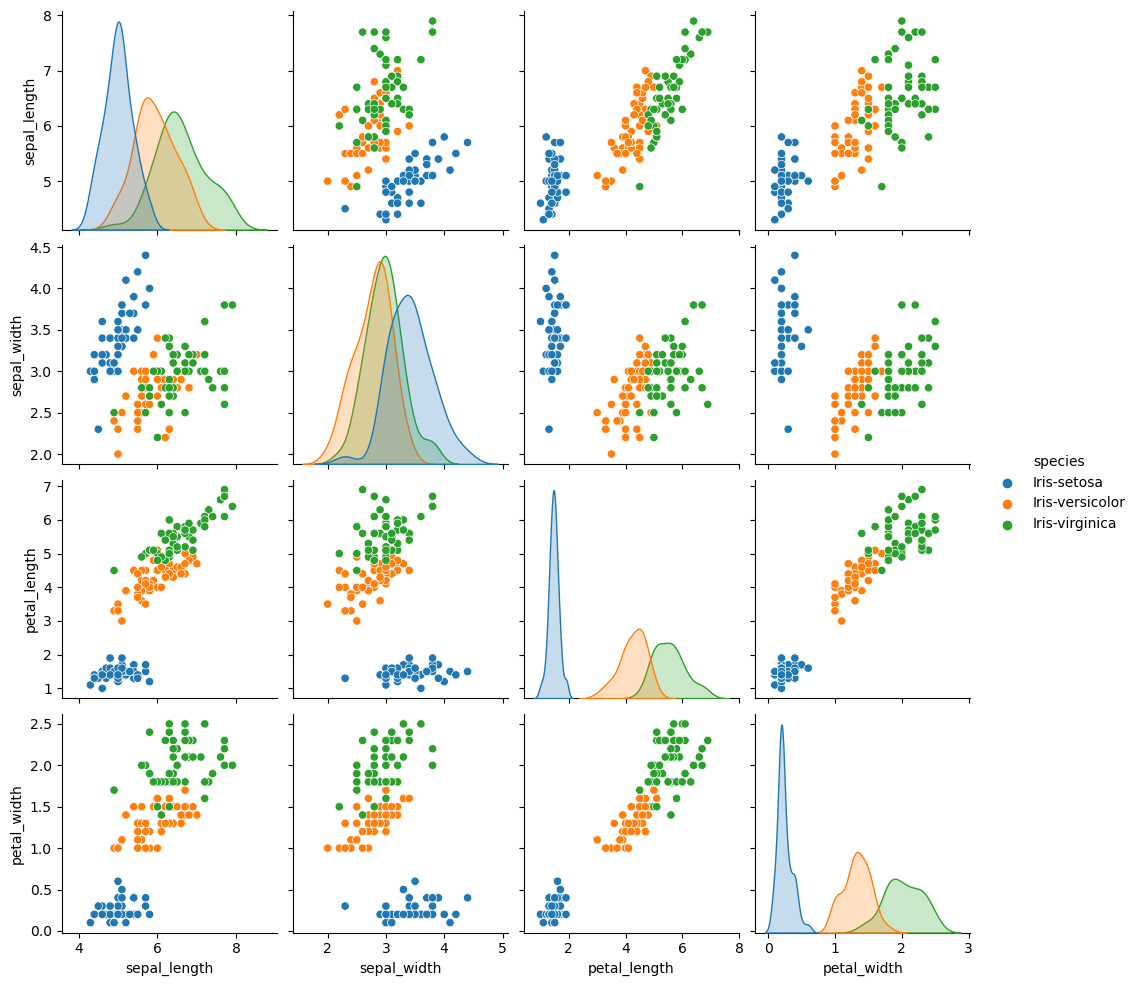

In [16]:
# Pairplot to visualize relationships between features
sns.pairplot(df, hue='species')
plt.show()

## Barplot to visualize count of each Iris species

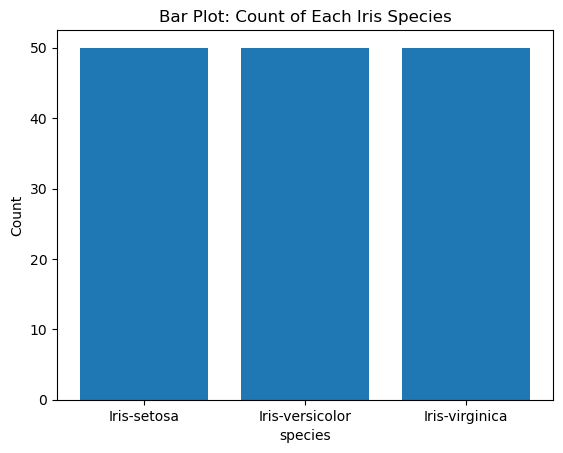

In [17]:
# Counts occurrences of each species
species_count = df['species'].value_counts()

# Creates a bar plot for species counts
plt.bar(species_count.index, species_count.values)
plt.xlabel('species')
plt.ylabel('Count')
plt.title('Bar Plot: Count of Each Iris Species')
plt.show()

## Histplots for sepal_length,sepal_width,petal_length and petal_width

array([[<AxesSubplot:title={'center':'sepal_length'}>,
        <AxesSubplot:title={'center':'sepal_width'}>],
       [<AxesSubplot:title={'center':'petal_length'}>,
        <AxesSubplot:title={'center':'petal_width'}>]], dtype=object)

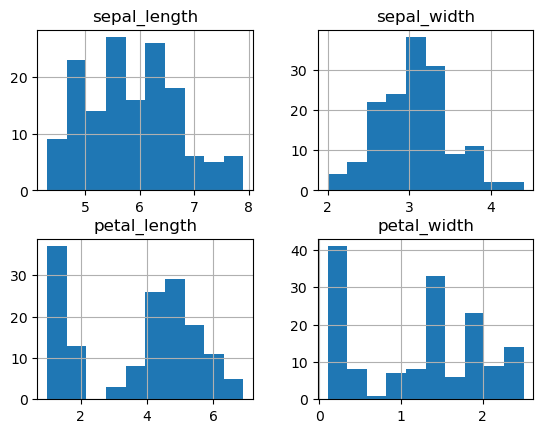

In [18]:
df.hist() #creates histplots for sepal_length,sepal_width,petal_length and petal_width

<AxesSubplot:>

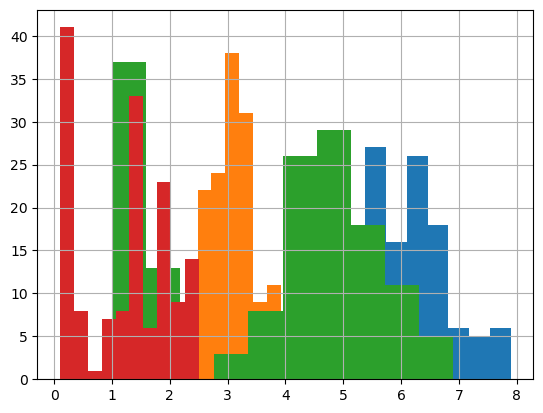

In [19]:
df['sepal_length'].hist()
df['sepal_width'].hist()
df['petal_length'].hist()
df['petal_width'].hist()

## Pie Chart for visualization

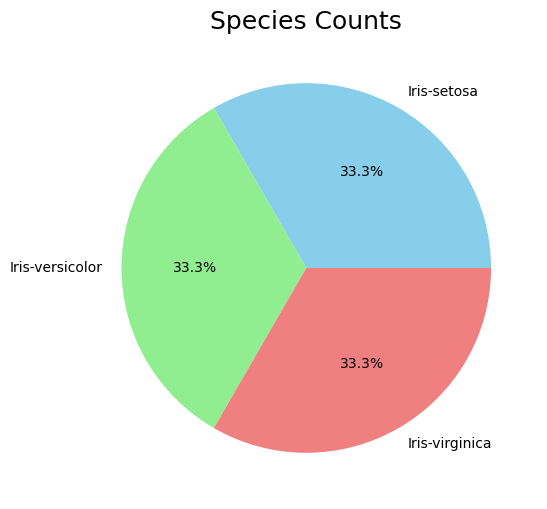

In [20]:
# Counts the occurrences of each species
count = df['species'].value_counts()

# Gets unique species labels
labels = count.index.tolist()

# Defines different colors for each section of the pie chart
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Pie Chart representation
plt.figure(figsize=(8, 6))
plt.pie(count, labels=labels, autopct='%1.1f%%', colors=colors)
plt.title("Species Counts", fontsize=18)
plt.show()

## Countplot for visualization

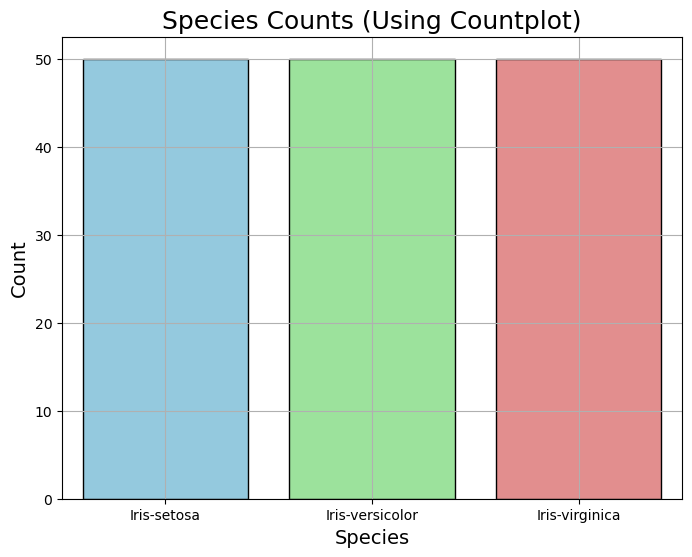

In [21]:
colors = ['skyblue', 'lightgreen', 'lightcoral']

#for creating Countplot using Seaborn 
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='species', ec='black', palette=colors)
plt.xlabel("Species", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Species Counts (Using Countplot)", fontsize=18)
plt.grid(True)
plt.show()

## Box plots for visualization

### Box plot for Sepal Length vs. Species

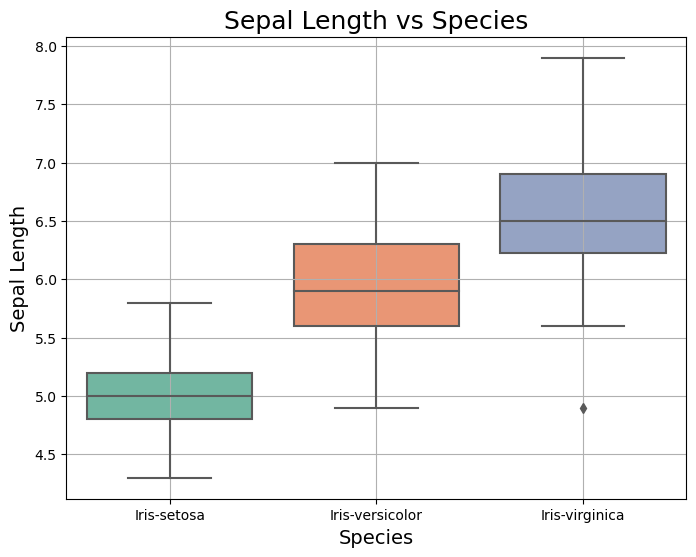

In [22]:
#Creating Box plot for Sepal Length vs. Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_length', data=df, palette='Set2')
plt.title('Sepal Length vs Species', fontsize=18)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Sepal Length', fontsize=14)
plt.grid(True)
plt.show()


## Box plot for Petal Length vs. Species

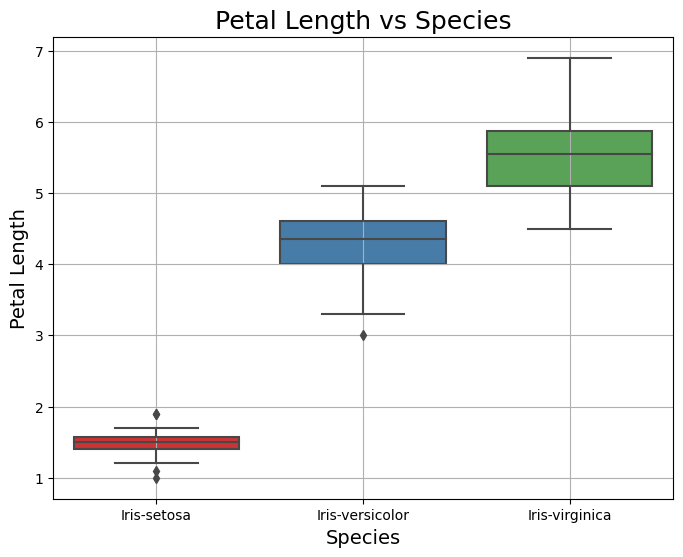

In [23]:
#Creating Box plot for Petal Length vs. Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal_length', data=df, palette='Set1') 
plt.title('Petal Length vs Species', fontsize=18)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Petal Length', fontsize=14)
plt.grid(True)
plt.show()

## Box plot for Sepal Width vs. Species

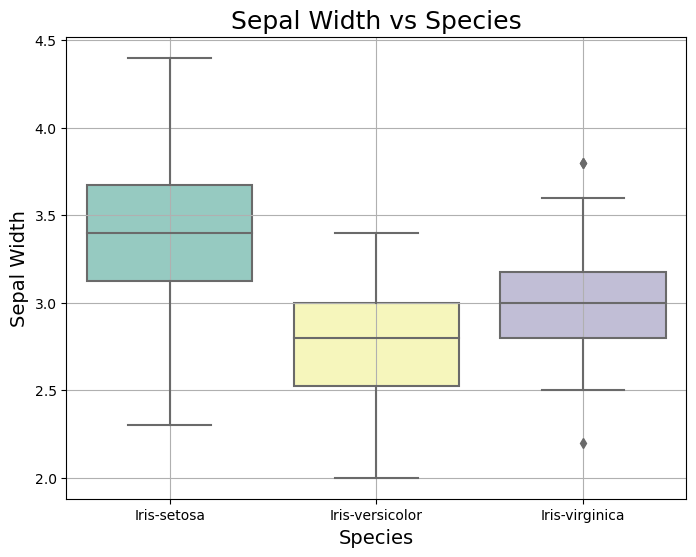

In [24]:
#Creating Box plot for Sepal Width vs. Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='sepal_width', data=df, palette='Set3')
plt.title('Sepal Width vs Species', fontsize=18)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Sepal Width', fontsize=14)
plt.grid(True)
plt.show()

## Boxplot for Petal Width vs. Species

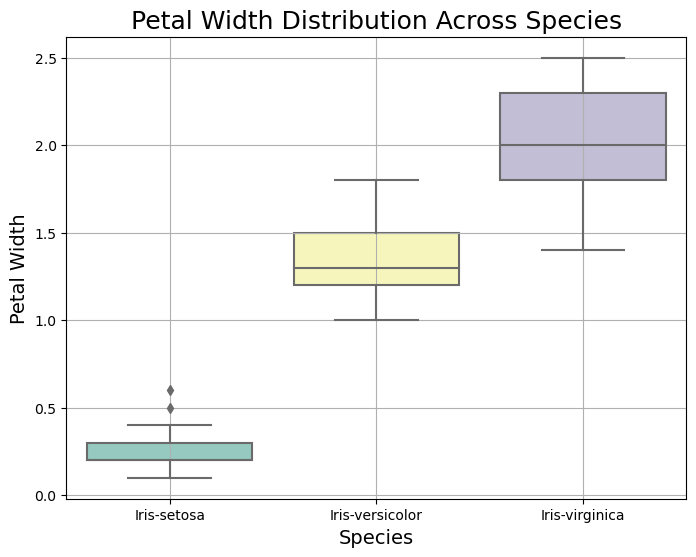

In [25]:
#Creating Box plot for Petal Width vs. Species
plt.figure(figsize=(8, 6))
sns.boxplot(x='species', y='petal_width', data=df, palette='Set3')
plt.title('Petal Width Distribution Across Species', fontsize=18)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Petal Width', fontsize=14)
plt.grid(True)
plt.show()

## Correlation Matrix

In [26]:
# Computing the correlation matrix 
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

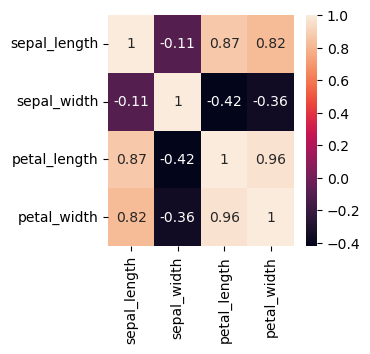

In [27]:
corr=df.corr()
plt.subplots(figsize=(3,3))
sns.heatmap(corr, annot=True)

<AxesSubplot:>

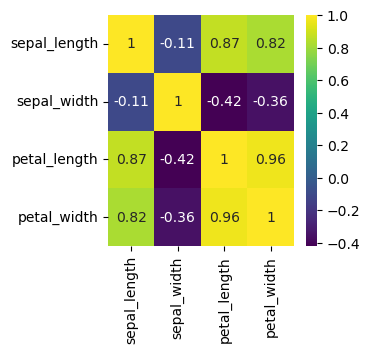

In [28]:
# displaying the correlation matrix using a heatmap
corr = df.corr()
fig, ax = plt.subplots(figsize=(3, 3))
sns.heatmap(corr, annot=True, ax=ax, cmap='viridis')

## Separating Independent Features (x) and Dependent Variable (y)

In [29]:
#Independent features
x = df.iloc[:,:4]
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
#Dependent feature
y = df.iloc[:,4]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

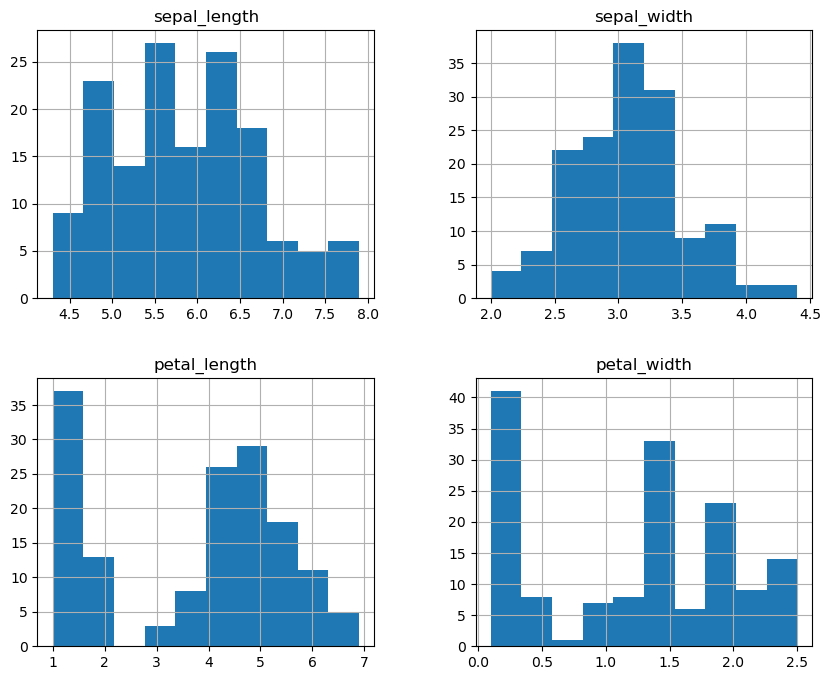

In [31]:
# Ploting histograms for each feature in x
x.hist(figsize=(10, 8))
plt.show()
     

## Splitting the Data into Train and Test Datasets

In [32]:
# Importing train_test_split for splitting the datasets
from sklearn.model_selection import train_test_split

# Splitting the features (x) and target variable (y) into training and testing datasets
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)

# Viewing the shapes of the training and testing datasets
print("Training Data Shape (Features):", x_train.shape)
print("Testing Data Shape (Features):", x_test.shape)
print("Training Data Shape (Target Variable):", y_train.shape)
print("Testing Data Shape (Target Variable):", y_test.shape)

Training Data Shape (Features): (112, 4)
Testing Data Shape (Features): (38, 4)
Training Data Shape (Target Variable): (112,)
Testing Data Shape (Target Variable): (38,)


## MODEL 1:- LOGISTIC REGRESSION

## Training the Model

In [33]:
# Importing Logistic Regression for making the model
from sklearn.linear_model import LogisticRegression

# Creating an instance of Logistic Regression model
model_lr = LogisticRegression()

# Training the model using the training datasets
model_lr.fit(x_train, y_train)


LogisticRegression()

## Making Predictions using the Trained Model

In [34]:
# Making predictions on the test dataset
y_pred = model_lr.predict(x_test)
print("Predicted Species:")
print(y_pred)

Predicted Species:
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']


## Classification Report

In [35]:
from sklearn.metrics import classification_report

# Generating and printing the classification report
classification_rep = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_rep)

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



## Confusion Matrix

In [36]:
from sklearn.metrics import confusion_matrix

# Generating and printing the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


## Accuracy of Model

In [37]:
from sklearn.metrics import accuracy_score

# Calculating and displaying the accuracy score
accuracy = accuracy_score(y_test, y_pred) * 100
print("Accuracy of the Logistic Regression model is {:.2f}%".format(accuracy))



Accuracy of the Logistic Regression model is 97.37%


## Prediction of New Data

In [38]:
# Predicting species for new data points
x_new = np.array([[5.2, 3.5, 1.5, 0.2], [1.9, 2.2, 3.8, 1.1], [3.2, 2.5, 4.6, 1.9]])
predicted_species = model_lr.predict(x_new)
print("Predicted Species for New Data Points:")
print(predicted_species)

Predicted Species for New Data Points:
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


## Cross Validation for Logistic Regression

In [39]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation on the Logistic Regression model
scores = cross_val_score(model_lr, x, y, cv=5)  

# Printing the cross-validation scores
print("Cross-Validation Scores:", scores)

# Calculating and printing the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy(LOGISTIC REGRESSION): {scores.mean()*100:.2f}")
print(f"Standard Deviation(LOGISTIC REGRESSION): {scores.std():.2f}")


Cross-Validation Scores: [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Accuracy(LOGISTIC REGRESSION): 97.33
Standard Deviation(LOGISTIC REGRESSION): 0.02


## MODEL 2 :- KNN

## Training the model with KNN,making predictions and generating classification report,confusion matrix and accuracy score

In [40]:
from sklearn.neighbors import KNeighborsClassifier

# Creating an instance of KNN model
model_knn = KNeighborsClassifier()

# Training the model using the training datasets
model_knn.fit(x_train, y_train)

# Making predictions on the test dataset
y_pred_knn = model_knn.predict(x_test)
print("Predicted Species (KNN):")
print(y_pred_knn)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generating and printing the classification report
classification_rep_knn = classification_report(y_test, y_pred_knn)
print("Classification Report (KNN):")
print(classification_rep_knn)

# Generating and printing the confusion matrix
conf_matrix_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix (KNN):")
print(conf_matrix_knn)

# Calculating and displaying the accuracy score
accuracy_knn = accuracy_score(y_test, y_pred_knn) * 100
print("Accuracy of the model (KNN) is {:.2f}%".format(accuracy_knn))


Predicted Species (KNN):
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']
Classification Report (KNN):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97

## Cross Validation for KNN

In [42]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation on the KNN model
scores_knn = cross_val_score(model_knn, x, y, cv=5)  # X is your feature matrix, y is your target variable

# Printing the cross-validation scores
print("Cross-Validation Scores (KNN):", scores_knn)

# Calculating and printing the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy (KNN): {scores_knn.mean()*100:.2f}")
print(f"Standard Deviation (KNN): {scores_knn.std():.2f}")


Cross-Validation Scores (KNN): [0.96666667 1.         0.93333333 0.96666667 1.        ]
Mean Accuracy (KNN): 97.33
Standard Deviation (KNN): 0.02


## MODEL 3:- DECISION TREE CLASSIFIER

## Training the model with Decision Tree Classifier,making predictions and generating classification report,confusion matrix and accuracy score

In [43]:
from sklearn.tree import DecisionTreeClassifier

# Creating an instance of Decision Tree Classifier
model_dt = DecisionTreeClassifier()

# Training the model using the training datasets
model_dt.fit(x_train, y_train)

# Making predictions on the test dataset
y_pred_dt = model_dt.predict(x_test)
print("Predicted Species (Decision Tree):")
print(y_pred_dt)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generating and printing the classification report
classification_rep_dt = classification_report(y_test, y_pred_dt)
print("Classification Report (Decision Tree):")
print(classification_rep_dt)

# Generating and printing the confusion matrix
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix (Decision Tree):")
print(conf_matrix_dt)

# Calculating and displaying the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt) * 100
print("Accuracy of the model (Decision Tree) is {:.2f}%".format(accuracy_dt))


Predicted Species (Decision Tree):
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']
Classification Report (Decision Tree):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      

## Cross Validation for Decision Tree Classifier

In [44]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation on the Decision Tree Classifier
scores_dt = cross_val_score(model_dt, x, y, cv=5)  

# Printing the cross-validation scores
print("Cross-Validation Scores (Decision Tree):", scores_dt)

# Calculating and printing the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy (Decision Tree): {scores_dt.mean()*100:.2f}")
print(f"Standard Deviation (Decision Tree): {scores_dt.std():.2f}")


Cross-Validation Scores (Decision Tree): [0.96666667 0.96666667 0.9        1.         1.        ]
Mean Accuracy (Decision Tree): 96.67
Standard Deviation (Decision Tree): 0.04


## MODEL 4:- NAIVE BAYES

## Training the model with Naive Bayes,making predictions and generating classification report,confusion matrix and accuracy score

In [45]:
from sklearn.naive_bayes import GaussianNB

# Creating an instance of Naive Bayes (Gaussian) Classifier
model_nb = GaussianNB()

# Training the model using the training datasets
model_nb.fit(x_train, y_train)

# Making predictions on the test dataset
y_pred_nb = model_nb.predict(x_test)
print("Predicted Species (Naive Bayes):")
print(y_pred_nb)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generating and printing the classification report
classification_rep_nb = classification_report(y_test, y_pred_nb)
print("Classification Report (Naive Bayes):")
print(classification_rep_nb)

# Generating and printing the confusion matrix
conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
print("Confusion Matrix (Naive Bayes):")
print(conf_matrix_nb)

# Calculating and displaying the accuracy score
accuracy_nb = accuracy_score(y_test, y_pred_nb) * 100
print("Accuracy of the model (Naive Bayes) is {:.2f}%".format(accuracy_nb))

Predicted Species (Naive Bayes):
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-versicolor']
Classification Report (Naive Bayes):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      1.00      1.00        16
 Iris-virginica       1.00      1.00      1.00         9

       accuracy                           1.00        38
      mac

## Cross Validation for Naive Bayes

In [46]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation on the Naive Bayes model
scores_nb = cross_val_score(model_nb, x, y, cv=5)

# Printing the cross-validation scores
print("Cross-Validation Scores (Naive Bayes):", scores_nb)

# Calculating and printing the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy (Naive Bayes): {scores_nb.mean()*100:.2f}")
print(f"Standard Deviation (Naive Bayes): {scores_nb.std():.2f}")

Cross-Validation Scores (Naive Bayes): [0.93333333 0.96666667 0.93333333 0.93333333 1.        ]
Mean Accuracy (Naive Bayes): 95.33
Standard Deviation (Naive Bayes): 0.03


## MODEL 5:- SVM

## Training the model with Naive Bayes,making predictions and generating classification report,confusion matrix and accuracy score

In [47]:
from sklearn.svm import SVC

# Creating an instance of Support Vector Machine (SVM) Classifier
model_svm = SVC()

# Training the model using the training datasets
model_svm.fit(x_train, y_train)

# Making predictions on the test dataset
y_pred_svm = model_svm.predict(x_test)
print("Predicted Species (SVM):")
print(y_pred_svm)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Generating and printing the classification report
classification_rep_svm = classification_report(y_test, y_pred_svm)
print("Classification Report (SVM):")
print(classification_rep_svm)

# Generating and printing the confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix (SVM):")
print(conf_matrix_svm)

# Calculating and displaying the accuracy score
accuracy_svm = accuracy_score(y_test, y_pred_svm) * 100
print("Accuracy of the model (SVM) is {:.2f}%".format(accuracy_svm))

Predicted Species (SVM):
['Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica'
 'Iris-setosa' 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-virginica' 'Iris-setosa' 'Iris-setosa' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-setosa' 'Iris-virginica']
Classification Report (SVM):
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97

## Cross Validation for SVM

In [48]:
from sklearn.model_selection import cross_val_score

# Performing 5-fold cross-validation on the SVM model
scores_svm = cross_val_score(model_svm, x, y, cv=5)  # X is your feature matrix, y is your target variable

# Printing the cross-validation scores
print("Cross-Validation Scores (SVM):", scores_svm)

# Calculating and printing the mean and standard deviation of the cross-validation scores
print(f"Mean Accuracy (SVM): {scores_svm.mean()*100:.2f}")
print(f"Standard Deviation (SVM): {scores_svm.std():.2f}")

Cross-Validation Scores (SVM): [0.96666667 0.96666667 0.96666667 0.93333333 1.        ]
Mean Accuracy (SVM): 96.67
Standard Deviation (SVM): 0.02


## MODEL EVALUATION AND SELECTION

#Model Summary:
    
Based on cross validation mean accuracy obtained and accuracy of the model obtained for each:-

1.Logistic Regression:

Mean Accuracy: 97.33%

Accuracy: 97.37%

2.K-Nearest Neighbors (KNN):

Mean Accuracy: 97.33%

Accuracy: 97.37%

3.Decision Tree:

Mean Accuracy: 96.67%

Accuracy: 97.37%

4.Naive Bayes:

Mean Accuracy: 95.33%

Accuracy: 100.00%

5.Support Vector Machine (SVM):

Mean Accuracy: 96.67%

Accuracy: 97.37%

All models, except Naive Bayes, have similar mean accuracy around 96-97%.

Naive Bayes achieved perfect accuracy in some runs but has a lower mean accuracy of 95.33%.

Logistic Regression, KNN, Decision Tree, and SVM showcase high accuracy, ranging from 96.67% to 97.33%.

Best Model for Iris Flower Classification:
    
K-Nearest Neighbors (KNN) and Logistic Regression are the top-performing models.

1- Both models exhibit consistent high accuracy (97.33%) with minimal variability (standard deviation: 0.02).

2- KNN and Logistic Regression demonstrate robust and reliable performance in classifying Iris flower species.

3- For simplicity and robustness, considering a tie between the two, Logistic Regression might be slightly preferred due to its interpretability and ease of implementation in many scenarios.

let us choose Logistic Regression for establishing a balance between performance and interpretability, providing a reliable solution for classifying Iris flowers.

## CONCLUSION

Using the Iris Flower dataset, I employed Logistic Regression to build a highly accurate classification model.

This model accurately categorized iris flowers into their respective species—setosa, versicolor, and virginica—with an impressive 97.37% accuracy.

The model's performance underscores its reliability and effectiveness in botanical classification tasks, demonstrating the power of machine learning in understanding nature's classifications. Its precision in predicting new data confirms its robustness and real-world applicability.

This successful application highlights the fusion of data science expertise and advanced algorithms, showcasing their pivotal role in decoding nature's complexities.

## A big thank you to the CODSOFT  for this opportunity! I'm grateful for the mentors and the team for their amazing support. This experience boosted my skills in data science and machine learning. I'm excited to use this knowledge ahead. Thanks for this incredible learning experience!